# Hometask 3

Попробуйте улучшить работу нейронной сети (разобранную на уроке) обучавшейся на датасет Fashion-MNIST. Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

**Решение ДЗ** ниже.

В данном случае мы будем использовать High API от TensorFlow

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2023-04-13 01:09:41.282461: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 01:09:42.350418: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


Импортируем Fashion MNIST датасет

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_labels.min(), train_labels.max()

(0, 9)

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Давайте посмотрим структуры полученного массива данных:

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Посмотрим первые 25 изображений:

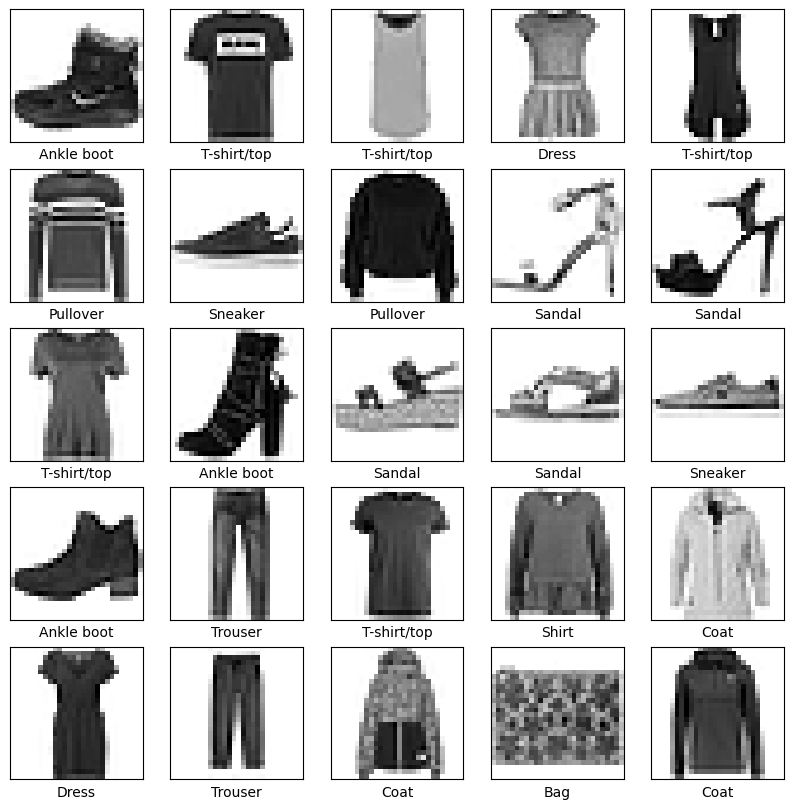

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(10)
])

2023-04-13 01:09:45.918090: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-13 01:09:46.052510: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-13 01:09:46.052578: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-13 01:09:46.055584: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-13 01:09:46.055706: I tensorflow/compile

Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [10]:
# Т.к. задача регрессии, удобнее использовать mean square error(средне-квадратичная ошибка).
# В качестве метрики берем mean absolute error (средний модуль ошибки)
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.

### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [11]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3


2023-04-13 01:09:49.494306: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f5f840506e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-13 01:09:49.494367: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1060, Compute Capability 6.1
2023-04-13 01:09:49.515832: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-13 01:09:49.792501: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-13 01:09:50.056213: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-13 01:09:50.184060: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 11s 5ms/step - loss: 0.4715 - accuracy: 0.8304
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3602 - accuracy: 0.8670
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3238 - accuracy: 0.8802


Оцениваем модель

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3579 - accuracy: 0.8706 - 1s/epoch - 3ms/step

Test accuracy: 0.8705999851226807


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых даыннх и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети - 

In [13]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [15]:
predictions[0]

array([1.5802309e-04, 4.2614311e-06, 5.1734928e-06, 1.1090357e-04,
       1.3937539e-04, 1.6476661e-02, 2.5371896e-04, 5.0356515e-02,
       4.5507080e-03, 9.2794472e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

In [18]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

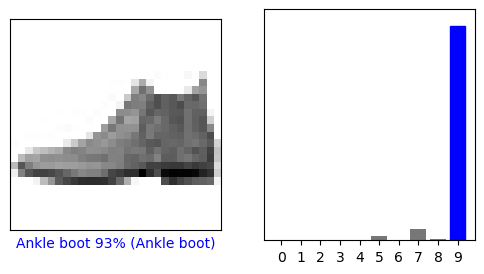

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

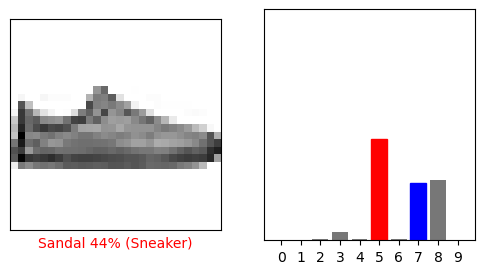

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний

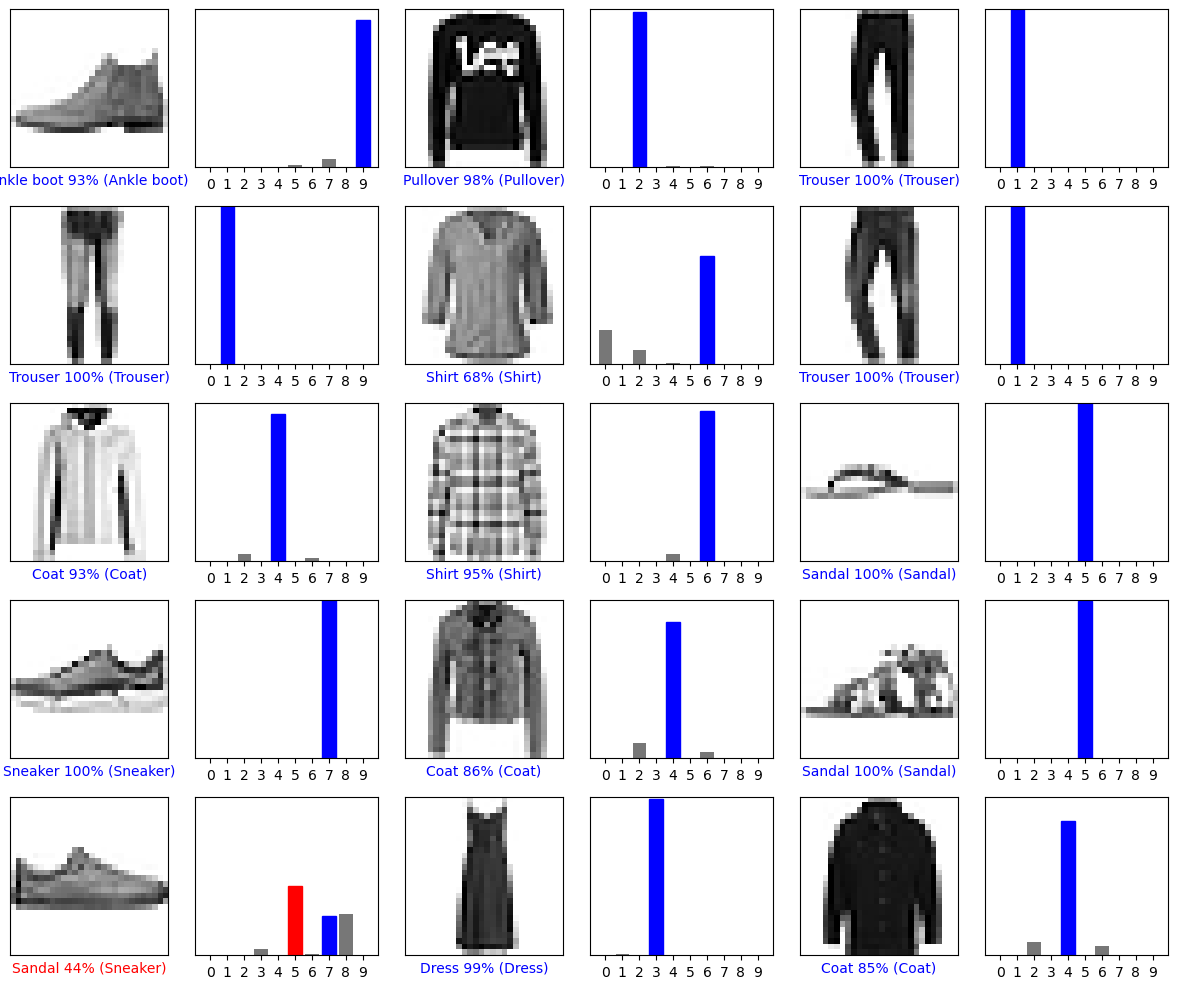

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети

In [22]:
img = test_images[1]

print(img.shape)

(28, 28)


In [23]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 25ms/step
[[1.2858034e-03 3.2509797e-05 9.8106235e-01 1.0833995e-04 6.9477032e-03
  1.1577808e-06 1.0513424e-02 3.8975270e-07 4.7624933e-05 8.2705702e-07]]


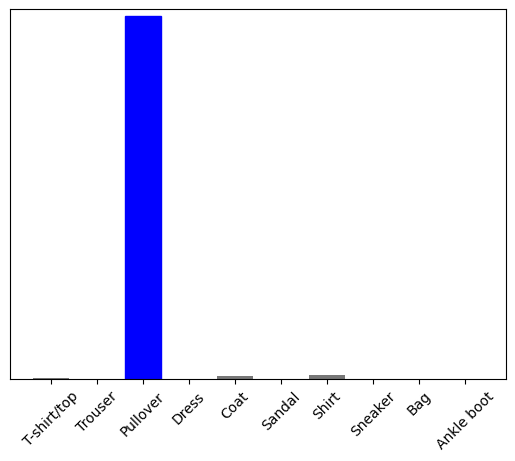

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [26]:
np.argmax(predictions_single[0])

2

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание

# Решение ДЗ

Попробуйте улучшить работу нейронной сети (разобранную на уроке) обучавшейся на датасет Fashion-MNIST. Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

Наученный прошлым опытом с длгими вычислениями при переборе всего буду делать всё последовательно. Так не будет найдено самое эффективное и точное решение. Зато за приемлемое время будет найдено приемлемое решение.

Построим 4 новых варианта сети к тому, что уже есть. И определим параметры, которые будем подбирать.

In [27]:
model0 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(10)
])
model0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [28]:
# orig model
def create_model0(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'], activation_layers='relu', activation_last='tanh'):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=activation_layers),
        keras.layers.Dense(64, activation=activation_last),
        keras.layers.Dense(10)
    ])
    
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    return model

In [29]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(int(28 * 28 / 4), activation='relu'),
    keras.layers.Dense(int(28 * 28 / 8), activation='tanh'),
    keras.layers.Dense(10)
])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 196)               153860    
                                                                 
 dense_7 (Dense)             (None, 98)                19306     
                                                                 
 dense_8 (Dense)             (None, 10)                990       
                                                                 
Total params: 174,156
Trainable params: 174,156
Non-trainable params: 0
_________________________________________________________________


In [30]:
def create_model1(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'], activation_layers='relu', activation_last='tanh'):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(int(28 * 28 / 4), activation=activation_layers),
        keras.layers.Dense(int(28 * 28 / 8), activation=activation_last),
        keras.layers.Dense(10)
    ])
    
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    return model

In [31]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(10)
])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
def create_model2(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'], activation_layers='relu', activation_last='tanh'):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(100, activation=activation_last),
        keras.layers.Dense(10)
    ])
    
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    return model

In [33]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(10)
])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)               

In [34]:
def create_model3(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'], activation_layers='relu', activation_last='tanh'):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=activation_layers),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation=activation_layers),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation=activation_last),
        keras.layers.Dense(10)
    ])
    
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    return model

In [35]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(10)
])
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 64)               

In [36]:
def create_model4(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'], activation_layers='relu', activation_last='tanh'):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=activation_layers),
        keras.layers.Dense(64, activation=activation_layers),
        keras.layers.Dense(64, activation=activation_layers),
        keras.layers.Dense(64, activation=activation_layers),
        keras.layers.Dense(64, activation=activation_layers),
        keras.layers.Dense(64, activation=activation_layers),
        keras.layers.Dense(64, activation=activation_layers),
        keras.layers.Dense(32, activation=activation_last),
        keras.layers.Dense(10)
    ])
    
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    return model

Описание сетей:

- 0 -- Исходная модель
- 1 -- Как исходная, только в 1,5 раз больше обучаемых параметров
- 2 -- С одним скрытым слоем
- 3 -- 3 скрытых слоя (затухания градиента не должно быть) и dropout-ы
- 4 -- не слишком глубокая сеть, но ожидается затухание градиента. Значит есть вариант проверить, как функции активации будут влиять на это

In [37]:
params_grid = {
    'epochs':[3, 5, 10],
    'batch_size':[256, 512, 1024],
    'loss':['sparse_categorical_crossentropy', 'binary_crossentropy', 'mse'],
    'optimizer':['SGD', 'RMSprop', 'Adam'], #, 'Adagrad', 'Adamax'],
    'metrics':['accuracy', 'mae', 'hinge'],
    'activation_layers':['relu', 'elu', 'selu'],
    'activation_last':['tanh', 'sigmoid'],
}

In [38]:
X_train = train_images
y_train = train_labels

X_test = test_images
y_test = test_labels

Начнём выбо модели и подбор параметров с размера батча:

In [39]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model0, create_model1, create_model2, create_model3, create_model4]):
    weight_flag[i] = False
    for batch_size in params_grid['batch_size']:
        model = func_create_model(loss='sparse_categorical_crossentropy')
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=3, batch_size=batch_size, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results, ' batch_size = ', batch_size)

        # model, loss, loss_err, acc
        results_list.append([i + 1, batch_size, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'batch_size', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=False)

313/313 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1117
test loss, test acc: [2.30259108543396, 0.11169999837875366]  batch_size =  256
313/313 [==============================] - 1s 4ms/step - loss: 2.3012 - accuracy: 0.1142
test loss, test acc: [2.3012094497680664, 0.11420000344514847]  batch_size =  512
313/313 [==============================] - 1s 4ms/step - loss: 2.9481 - accuracy: 0.1942
test loss, test acc: [2.948131561279297, 0.19419999420642853]  batch_size =  1024
313/313 [==============================] - 1s 4ms/step - loss: 6.5769 - accuracy: 0.1000
test loss, test acc: [6.576932907104492, 0.10000000149011612]  batch_size =  256
313/313 [==============================] - 1s 4ms/step - loss: 3.4918 - accuracy: 0.1998
test loss, test acc: [3.4917731285095215, 0.19979999959468842]  batch_size =  512
313/313 [==============================] - 1s 4ms/step - loss: 5.2205 - accuracy: 0.1031
test loss, test acc: [5.220481872558594, 0.1031000018119812

,model,batch_size,loss_err,acc
4,2,512,3.491773,0.1998
8,3,1024,1.427246,0.1986
2,1,1024,2.948132,0.1942
1,1,512,2.301209,0.1142
0,1,256,2.302591,0.1117
11,4,1024,2.215819,0.1035
5,2,1024,5.220482,0.1031
3,2,256,6.576933,0.1000
6,3,256,6.560358,0.1000
7,3,512,5.080731,0.1000


Т.к. теперь на итерацию приходится чуть больше минуты, то запустил три раза подряд. И каждый раз новые результаты. Первый раз опмитальным выбором было 256, второй 512, третий - однозначный победитель среди батчей 1024. Какие данные останутся в последнем ноутбуке - не известно. Буду использовать 1024.

Теперь оценка функции потери.

In [40]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model0, create_model1, create_model2, create_model3, create_model4]):
    weight_flag[i] = False
    for loss in params_grid['loss']:
        model = func_create_model(loss=loss)
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=3, batch_size=1024, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results, ' loss = ', loss)

        # model, loss, loss_err, acc
        results_list.append([i + 1, loss, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'loss', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=False)

313/313 [==============================] - 1s 4ms/step - loss: 1.2064 - accuracy: 0.6909
test loss, test acc: [1.2064441442489624, 0.6909000277519226]  loss =  sparse_categorical_crossentropy
313/313 [==============================] - 1s 4ms/step - loss: -53.3706 - accuracy: 0.1602
test loss, test acc: [-53.37062454223633, 0.16019999980926514]  loss =  binary_crossentropy
313/313 [==============================] - 1s 4ms/step - loss: 2.4259 - accuracy: 0.1494
test loss, test acc: [2.4258530139923096, 0.149399995803833]  loss =  mse
313/313 [==============================] - 2s 5ms/step - loss: 2.9928 - accuracy: 0.1045
test loss, test acc: [2.992849349975586, 0.10450000315904617]  loss =  sparse_categorical_crossentropy
313/313 [==============================] - 2s 5ms/step - loss: -53.3683 - accuracy: 0.1000
test loss, test acc: [-53.36830139160156, 0.10000000149011612]  loss =  binary_crossentropy
313/313 [==============================] - 1s 5ms/step - loss: 2.2611 - accuracy: 0.081

,model,loss,loss_err,acc
0,1,sparse_categorical_crossentropy,1.206444,0.6909
7,3,binary_crossentropy,-41.082951,0.1972
11,4,mse,2.759361,0.1622
1,1,binary_crossentropy,-53.370625,0.1602
2,1,mse,2.425853,0.1494
14,5,mse,2.585958,0.1327
3,2,sparse_categorical_crossentropy,2.992849,0.1045
6,3,sparse_categorical_crossentropy,1.495517,0.1033
4,2,binary_crossentropy,-53.368301,0.1000
9,4,sparse_categorical_crossentropy,7.946403,0.1000


Однозначный победительно (после двух запусков) sparse_categorical_crossentropy.

Далее подбор optimizer

In [41]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model0, create_model1, create_model2, create_model3, create_model4]):
    weight_flag[i] = False
    for optimizer in params_grid['optimizer']:
        model = func_create_model(loss='sparse_categorical_crossentropy', optimizer=optimizer)
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=3, batch_size=1024, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results, ' loss = ', loss)

        # model, loss, loss_err, acc
        results_list.append([i + 1, optimizer, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'optimizer', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=False)

313/313 [==============================] - 1s 4ms/step - loss: 1.4903 - accuracy: 0.1000
test loss, test acc: [1.4902774095535278, 0.10000000149011612]  loss =  mse
313/313 [==============================] - 1s 5ms/step - loss: 2.2731 - accuracy: 0.2383
test loss, test acc: [2.2731173038482666, 0.23829999566078186]  loss =  mse
313/313 [==============================] - 1s 4ms/step - loss: 1.3647 - accuracy: 0.2929
test loss, test acc: [1.3646790981292725, 0.2928999960422516]  loss =  mse
313/313 [==============================] - 1s 4ms/step - loss: 5.0610 - accuracy: 0.1299
test loss, test acc: [5.061007976531982, 0.1298999935388565]  loss =  mse
313/313 [==============================] - 1s 5ms/step - loss: 2.1489 - accuracy: 0.4416
test loss, test acc: [2.1489040851593018, 0.4415999948978424]  loss =  mse
313/313 [==============================] - 1s 4ms/step - loss: 2.2998 - accuracy: 0.2569
test loss, test acc: [2.2998344898223877, 0.25690001249313354]  loss =  mse
313/313 [=====

,model,optimizer,loss_err,acc
10,4,RMSprop,0.851860,0.7523
11,4,Adam,1.069508,0.6204
4,2,RMSprop,2.148904,0.4416
7,3,RMSprop,1.933873,0.3962
2,1,Adam,1.364679,0.2929
5,2,Adam,2.299834,0.2569
1,1,RMSprop,2.273117,0.2383
13,5,RMSprop,2.149711,0.1768
14,5,Adam,2.303322,0.1539
3,2,SGD,5.061008,0.1299


Опять однозначный победитель (3/4) RMSprop.

Теперь подбор метрики.

In [42]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model0, create_model1, create_model2, create_model3, create_model4]):
    weight_flag[i] = False
    for metrics in params_grid['metrics']:
        model = func_create_model(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=metrics)
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=3, batch_size=1024, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results, ' loss = ', loss)

        # model, loss, loss_err, acc
        results_list.append([i + 1, metrics, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'metrics', 'loss_err', 'acc'])

313/313 [==============================] - 1s 4ms/step - loss: 2.2683 - accuracy: 0.6125
test loss, test acc: [2.268320322036743, 0.612500011920929]  loss =  mse
313/313 [==============================] - 1s 4ms/step - loss: 2.2543 - mae: 6.3432
test loss, test acc: [2.254335403442383, 6.343235015869141]  loss =  mse
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - hinge: 9.9896
test loss, test acc: [2.302360773086548, 9.989583969116211]  loss =  mse
313/313 [==============================] - 1s 4ms/step - loss: 1.3044 - accuracy: 0.6575
test loss, test acc: [1.3044387102127075, 0.6575000286102295]  loss =  mse
313/313 [==============================] - 2s 5ms/step - loss: 2.3017 - mae: 6.8895
test loss, test acc: [2.3016698360443115, 6.889468669891357]  loss =  mse
313/313 [==============================] - 1s 4ms/step - loss: 2.3058 - hinge: 10.4800
test loss, test acc: [2.3057942390441895, 10.479982376098633]  loss =  mse
313/313 [=============================

In [43]:
df_results[df_results['metrics'] == 'accuracy'].sort_values('acc', axis=0, ascending=False)

,model,metrics,loss_err,acc
9,4,accuracy,0.999770,0.6628
3,2,accuracy,1.304439,0.6575
0,1,accuracy,2.268320,0.6125
6,3,accuracy,2.303670,0.4294
12,5,accuracy,2.303250,0.1014


In [44]:
df_results[df_results['metrics'] == 'mae'].sort_values('acc', axis=0, ascending=True)

,model,metrics,loss_err,acc
10,4,mae,1.014952,4.838876
13,5,mae,2.303744,4.967848
1,1,mae,2.254335,6.343235
4,2,mae,2.301670,6.889469
7,3,mae,2.303494,6.964190


In [45]:
df_results[df_results['metrics'] == 'hinge'].sort_values('acc', axis=0, ascending=True)

,model,metrics,loss_err,acc
14,5,hinge,0.912660,1.291849
11,4,hinge,1.044450,3.203724
8,3,hinge,1.932547,8.137825
2,1,hinge,2.302361,9.989584
5,2,hinge,2.305794,10.479982


In [46]:
df_results.sort_values('loss_err', axis=0, ascending=True)

,model,metrics,loss_err,acc
14,5,hinge,0.912660,1.291849
9,4,accuracy,0.999770,0.662800
10,4,mae,1.014952,4.838876
11,4,hinge,1.044450,3.203724
3,2,accuracy,1.304439,0.657500
8,3,hinge,1.932547,8.137825
1,1,mae,2.254335,6.343235
0,1,accuracy,2.268320,0.612500
4,2,mae,2.301670,6.889469
2,1,hinge,2.302361,9.989584


У всех метрик разные изменения, так что сравнивать их между собой тяжело. Поэтому среди полученных данных будет гадание на кофейной гуще. И выбор падает на `mae`

Теперь проверка функции активации скрытых слоев.

In [47]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model0, create_model1, create_model2, create_model3, create_model4]):
    weight_flag[i] = False
    for activation_layers in params_grid['activation_layers']:
        model = func_create_model(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics='mae',
                                  activation_layers=activation_layers)
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=3, batch_size=1024, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results, 'activation_layers = ', activation_layers)

        # model, loss, loss_err, acc
        results_list.append([i + 1, activation_layers, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'activation_layers', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=True)

313/313 [==============================] - 1s 4ms/step - loss: 2.2918 - mae: 6.0749
test loss, test acc: [2.291768789291382, 6.074915885925293] activation_layers =  relu
313/313 [==============================] - 1s 4ms/step - loss: 2.3021 - mae: 6.4514
test loss, test acc: [2.302125930786133, 6.451361656188965] activation_layers =  elu
313/313 [==============================] - 2s 5ms/step - loss: 1.2518 - mae: 4.8493
test loss, test acc: [1.251765489578247, 4.849260330200195] activation_layers =  selu
313/313 [==============================] - 1s 4ms/step - loss: 2.2108 - mae: 6.5372
test loss, test acc: [2.210831642150879, 6.537186622619629] activation_layers =  relu
313/313 [==============================] - 1s 5ms/step - loss: 2.2349 - mae: 6.7434
test loss, test acc: [2.2349276542663574, 6.743432998657227] activation_layers =  elu
313/313 [==============================] - 1s 4ms/step - loss: 2.3021 - mae: 6.5817
test loss, test acc: [2.3021304607391357, 6.581699848175049] activa

,model,activation_layers,loss_err,acc
12,5,relu,0.843484,4.565868
9,4,relu,1.014044,4.699633
7,3,elu,1.333481,4.733470
2,1,selu,1.251765,4.849260
13,5,elu,1.202957,4.859041
11,4,selu,1.305733,4.871173
10,4,elu,1.047150,4.970052
14,5,selu,1.038486,4.982368
6,3,relu,1.847245,5.642294
8,3,selu,2.676548,5.711587


Три запуска и три разных результата. Значит плюс/минус можно выбирать любую. Пусть будет `selu`

Посмотрим, что можно использовать на выходном слое.

In [48]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model0, create_model1, create_model2, create_model3, create_model4]):
    weight_flag[i] = False
    for activation_last in params_grid['activation_last']:
        model = func_create_model(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics='mae',
                                  activation_layers='selu', activation_last=activation_last)
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=3, batch_size=1024, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results, 'activation_last = ', activation_layers)

        # model, loss, loss_err, acc
        results_list.append([i + 1, activation_last, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'activation_last', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=True)

313/313 [==============================] - 1s 5ms/step - loss: 1.1683 - mae: 4.8529
test loss, test acc: [1.1682969331741333, 4.852935791015625] activation_last =  selu
313/313 [==============================] - 1s 5ms/step - loss: 2.3026 - mae: 5.4254
test loss, test acc: [2.30259108543396, 5.425378322601318] activation_last =  selu
313/313 [==============================] - 1s 4ms/step - loss: 2.2429 - mae: 6.9574
test loss, test acc: [2.2428793907165527, 6.957401752471924] activation_last =  selu
313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - mae: 5.8281
test loss, test acc: [2.30259108543396, 5.828081130981445] activation_last =  selu
313/313 [==============================] - 1s 4ms/step - loss: 1.3465 - mae: 4.8289
test loss, test acc: [1.346503496170044, 4.828935146331787] activation_last =  selu
313/313 [==============================] - 1s 4ms/step - loss: 2.2731 - mae: 5.4960
test loss, test acc: [2.273117780685425, 5.496011257171631] activation_last 

,model,activation_last,loss_err,acc
8,5,tanh,1.279051,4.641296
7,4,sigmoid,0.914271,4.735073
4,3,tanh,1.346503,4.828935
0,1,tanh,1.168297,4.852936
6,4,tanh,1.205595,5.026815
9,5,sigmoid,2.302591,5.072651
1,1,sigmoid,2.302591,5.425378
5,3,sigmoid,2.273118,5.496011
3,2,sigmoid,2.302591,5.828081
2,2,tanh,2.242879,6.957402


Гиперболический тангенс победитель.

Проверим теорию, что достаточно небольшое количество итераций будет улучшать результаты с каждой итерацией на достаточно большое значение. Переобучение делать не будет, чтобы не затягивать процесс.

In [49]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model0, create_model1, create_model2, create_model3, create_model4]):
    weight_flag[i] = False
    for epochs in params_grid['epochs']:
        model = func_create_model(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics='mae',
                                  activation_layers='selu', activation_last='tanh')
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=epochs, batch_size=1024, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results, 'epochs = ', epochs)

        # model, loss, loss_err, acc
        results_list.append([i + 1, epochs, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'epochs', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=True)

313/313 [==============================] - 1s 5ms/step - loss: 1.8907 - mae: 5.5171
test loss, test acc: [1.890744686126709, 5.517134189605713] epochs =  3
313/313 [==============================] - 1s 5ms/step - loss: 2.2991 - mae: 6.4288
test loss, test acc: [2.2991371154785156, 6.428822994232178] epochs =  5
313/313 [==============================] - 1s 4ms/step - loss: 0.8994 - mae: 5.1855
test loss, test acc: [0.8993785381317139, 5.185533046722412] epochs =  10
313/313 [==============================] - 1s 4ms/step - loss: 1.1137 - mae: 5.2437
test loss, test acc: [1.1137038469314575, 5.2437028884887695] epochs =  3
313/313 [==============================] - 1s 4ms/step - loss: 1.2795 - mae: 5.1385
test loss, test acc: [1.2794570922851562, 5.138489723205566] epochs =  5
313/313 [==============================] - 1s 4ms/step - loss: 2.3021 - mae: 6.6614
test loss, test acc: [2.3021304607391357, 6.6614251136779785] epochs =  10
313/313 [==============================] - 1s 4ms/step 

,model,epochs,loss_err,acc
13,5,5,1.086733,4.741013
14,5,10,1.709521,4.795680
12,5,3,1.146945,4.820619
9,4,3,1.243134,4.910577
4,2,5,1.279457,5.138490
10,4,5,1.136547,5.182757
2,1,10,0.899379,5.185533
3,2,3,1.113704,5.243703
11,4,10,1.074955,5.245607
6,3,3,1.034046,5.266931


In [50]:
df_results.sort_values('model', axis=0, ascending=True)

,model,epochs,loss_err,acc
0,1,3,1.890745,5.517134
1,1,5,2.299137,6.428823
2,1,10,0.899379,5.185533
3,2,3,1.113704,5.243703
4,2,5,1.279457,5.138490
5,2,10,2.302130,6.661425
6,3,3,1.034046,5.266931
7,3,5,1.505208,5.732395
8,3,10,2.302591,7.092288
9,4,3,1.243134,4.910577


Согласно теории: "MAE : метрика, которая сообщает нам среднюю абсолютную разницу между прогнозируемыми значениями и фактическими значениями в наборе данных. Чем ниже MAE, тем лучше модель соответствует набору данных.". Получается, что 3 эпохи дают лучший результат, а дальше похоже наступает переобучение. Пока не знаю, как интерпретировать полученный результат.

Итак, победитель определён. Четвёртая и пятая сети показали наилучшие результаты.

Теперь можно попробовать подобрать более точные параметры в функциях активации и потерь с помощью tensorflow.

In [51]:
params_grid2 = {
    'from_logits': [True, False],
    'reduction': [tf.keras.losses.Reduction.NONE, tf.keras.losses.Reduction.SUM, tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE]
}

Т.к. вычисления идут на видеоадаптере, то продолжаем перечирать с помощью цикла, чтобы не выйти за пределы памяти.

In [52]:
def create_model3_(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics='mae',
                                  activation_layers='selu', activation_last='tanh',
                  from_logits=True, reduction=tf.keras.losses.Reduction.AUTO):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=activation_layers),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation=activation_layers),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation=activation_last),
        keras.layers.Dense(10)
    ])
    
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=from_logits, reduction=reduction),
                  optimizer=optimizer, metrics=metrics)
    
    return model

In [53]:
def create_model4_(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics='mae',
                                  activation_layers='selu', activation_last='tanh',
                  from_logits=True, reduction=tf.keras.losses.Reduction.AUTO):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=activation_layers),
        keras.layers.Dense(64, activation=activation_layers),
        keras.layers.Dense(64, activation=activation_layers),
        keras.layers.Dense(64, activation=activation_layers),
        keras.layers.Dense(64, activation=activation_layers),
        keras.layers.Dense(64, activation=activation_layers),
        keras.layers.Dense(64, activation=activation_layers),
        keras.layers.Dense(32, activation=activation_last),
        keras.layers.Dense(10)
    ])
    
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=from_logits, reduction=reduction),
                  optimizer=optimizer, metrics=metrics)
    
    return model

In [54]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model3_, create_model4_]):
    weight_flag[i] = False
    for from_logits in params_grid2['from_logits']:
        model = func_create_model(from_logits=from_logits)
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=3, batch_size=1024, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results, 'from_logits = ', from_logits)

        # model, loss, loss_err, acc
        results_list.append([i + 4, from_logits, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'from_logits', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=True)

313/313 [==============================] - 1s 4ms/step - loss: 0.5667 - mae: 4.9200
test loss, test acc: [0.566693902015686, 4.919970512390137] from_logits =  True
313/313 [==============================] - 1s 4ms/step - loss: 1.1990 - mae: 4.7716
test loss, test acc: [1.1989678144454956, 4.7715630531311035] from_logits =  False
313/313 [==============================] - 1s 4ms/step - loss: 0.6159 - mae: 4.6663
test loss, test acc: [0.6159404516220093, 4.666321754455566] from_logits =  True
313/313 [==============================] - 1s 4ms/step - loss: 1.5602 - mae: 4.4475
test loss, test acc: [1.5602138042449951, 4.44750452041626] from_logits =  False
CPU times: user 18.6 s, sys: 4.12 s, total: 22.7 s
Wall time: 18.7 s


,model,from_logits,loss_err,acc
3,5,False,1.560214,4.447505
2,5,True,0.615940,4.666322
1,4,False,1.198968,4.771563
0,4,True,0.566694,4.919971


In [55]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model3_, create_model4_]):
    weight_flag[i] = False
    for reduction in params_grid2['reduction']:
        model = func_create_model(from_logits=False, reduction=reduction)
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=3, batch_size=1024, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results, 'reduction = ', reduction)

        # model, loss, loss_err, acc
        results_list.append([i + 4, reduction, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'reduction', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=True)

313/313 [==============================] - 1s 4ms/step - loss: 1.2088 - mae: 4.9560
test loss, test acc: [1.2087987661361694, 4.955967903137207] reduction =  none
313/313 [==============================] - 1s 4ms/step - loss: 42.0814 - mae: 4.8187
test loss, test acc: [42.08137893676758, 4.8187031745910645] reduction =  sum
313/313 [==============================] - 1s 4ms/step - loss: 1.3425 - mae: 4.8918
test loss, test acc: [1.3424879312515259, 4.891799449920654] reduction =  sum_over_batch_size
313/313 [==============================] - 2s 5ms/step - loss: 1.4887 - mae: 4.6109
test loss, test acc: [1.488698959350586, 4.610898017883301] reduction =  none
313/313 [==============================] - 1s 4ms/step - loss: 43.7221 - mae: 4.9136
test loss, test acc: [43.72213363647461, 4.913555145263672] reduction =  sum
313/313 [==============================] - 1s 4ms/step - loss: 1.1472 - mae: 4.8611
test loss, test acc: [1.1471823453903198, 4.861095428466797] reduction =  sum_over_batch

,model,reduction,loss_err,acc
3,5,none,1.488699,4.610898
1,4,sum,42.081379,4.818703
5,5,sum_over_batch_size,1.147182,4.861095
2,4,sum_over_batch_size,1.342488,4.891799
4,5,sum,43.722134,4.913555
0,4,none,1.208799,4.955968


Баш на баш.

Для функции активации будем подбирать следующие параметры. Правда, возьмём relu, так у неё есть параметры.

In [56]:
params_grid3 = {
    'alpha':[0.1, 0.2, 0.5],
    'threshold':[0.0, 0.5, 0.9]
}

In [57]:
def create_relu_advanced(alpha=0.5, threshold=0.0):        
    def relu_advanced(x):
        return tf.keras.activations.relu(x, alpha=alpha, threshold=threshold)
    return relu_advanced

In [58]:
def create_model3_2(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics='mae',
                                  activation_layers='selu', activation_last='tanh',
                                   alpha=0.1, threshold=0.0):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(10)
    ])
    
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.AUTO),
                  optimizer=optimizer, metrics=metrics)
    
    return model

In [59]:
def create_model4_2(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics='mae',
                                  activation_layers='selu', activation_last='tanh',
                                   alpha=0.1, threshold=0.0):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(64, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(64, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(64, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(64, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(64, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(64, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(32, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(10)
    ])
    
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.AUTO),
                  optimizer=optimizer, metrics=metrics)
    
    return model

In [60]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model3_2, create_model4_2]):
    weight_flag[i] = False
    for alpha in params_grid3['alpha']:
        model = func_create_model(alpha=alpha)
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=3, batch_size=1024, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results, 'alpha = ', alpha)

        # model, loss, loss_err, acc
        results_list.append([i + 4, alpha, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'alpha', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=True)

313/313 [==============================] - 1s 4ms/step - loss: 0.9327 - mae: 4.6712
test loss, test acc: [0.932654619216919, 4.671226978302002] alpha =  0.1
313/313 [==============================] - 1s 4ms/step - loss: 1.0000 - mae: 4.6330
test loss, test acc: [1.0000332593917847, 4.632980823516846] alpha =  0.2
313/313 [==============================] - 1s 4ms/step - loss: 1.1951 - mae: 4.9860
test loss, test acc: [1.1951324939727783, 4.985992908477783] alpha =  0.5
313/313 [==============================] - 1s 4ms/step - loss: 0.9241 - mae: 4.5314
test loss, test acc: [0.9240540862083435, 4.531401634216309] alpha =  0.1
313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - mae: 5.0036
test loss, test acc: [2.30259108543396, 5.0036234855651855] alpha =  0.2
313/313 [==============================] - 2s 6ms/step - loss: 2.3019 - mae: 7.2654
test loss, test acc: [2.3019001483917236, 7.265434265136719] alpha =  0.5
CPU times: user 29 s, sys: 6.25 s, total: 35.2 s
Wall 

,model,alpha,loss_err,acc
3,5,0.1,0.924054,4.531402
1,4,0.2,1.000033,4.632981
0,4,0.1,0.932655,4.671227
2,4,0.5,1.195132,4.985993
4,5,0.2,2.302591,5.003623
5,5,0.5,2.301900,7.265434


In [61]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model3_2, create_model4_2]):
    weight_flag[i] = False
    for threshold in params_grid3['threshold']:
        model = func_create_model(alpha=0.1, threshold=threshold)
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=3, batch_size=1024, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results, 'threshold = ', threshold)

        # model, loss, loss_err, acc
        results_list.append([i + 4, threshold, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'threshold', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=True)

313/313 [==============================] - 1s 4ms/step - loss: 0.8627 - mae: 4.7191
test loss, test acc: [0.8626862168312073, 4.719117641448975] threshold =  0.0
313/313 [==============================] - 1s 4ms/step - loss: 1.7786 - mae: 4.4583
test loss, test acc: [1.7786105871200562, 4.458265781402588] threshold =  0.5
313/313 [==============================] - 1s 5ms/step - loss: 2.2304 - mae: 4.6270
test loss, test acc: [2.2303659915924072, 4.626997947692871] threshold =  0.9
313/313 [==============================] - 1s 5ms/step - loss: 0.8935 - mae: 4.5616
test loss, test acc: [0.8935025334358215, 4.561628341674805] threshold =  0.0
313/313 [==============================] - 2s 6ms/step - loss: 2.3026 - mae: 4.5287
test loss, test acc: [2.30259108543396, 4.528728008270264] threshold =  0.5
313/313 [==============================] - 2s 7ms/step - loss: 2.3026 - mae: 4.5435
test loss, test acc: [2.30259108543396, 4.543492317199707] threshold =  0.9
CPU times: user 32.1 s, sys: 8.5

,model,threshold,loss_err,acc
1,4,0.5,1.778611,4.458266
4,5,0.5,2.302591,4.528728
5,5,0.9,2.302591,4.543492
3,5,0.0,0.893503,4.561628
2,4,0.9,2.230366,4.626998
0,4,0.0,0.862686,4.719118


Однозначный выбор threshold = 0,5. А вот победитель среди моделей никак не поеределяется. После двух запусков получается 50/50. Но по наблюдениям, чаще всего побеждает последняя модель, которая самая глубокая из всех построенных. При этом не слишком глубокая, но со слоями Dropout-а тоже не отстаёт. Возможно микс этих можеделей дал бы ещё больший прирост точности и скорости обучения.

Возьмём последнюю модель и дадим последний шанс количеству эпох обучения. Только в этот раз метрика будет `accuracy`, т.к. возможно `mae` я пока не верно интерпретирую.

In [87]:
def create_model4_3(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics='mae',
                                  activation_layers='selu', activation_last='tanh',
                                   alpha=0.1, threshold=0.5):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(64, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(64, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(64, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(64, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(64, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(64, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(32, activation=create_relu_advanced(alpha=alpha, threshold=threshold)),
        keras.layers.Dense(10)
    ])
    
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.AUTO),
                  optimizer=optimizer, metrics=metrics)
    
    return model

In [88]:
model = create_model4_3()
history = model.fit(X_train, y_train, epochs=20, batch_size=1024, validation_split=0.2, verbose=0)
results = model.evaluate(X_test, y_test)
print('test loss, test acc:', results)

313/313 [==============================] - 2s 6ms/step - loss: 2.3026 - mae: 4.5333
test loss, test acc: [2.30259108543396, 4.533333778381348]


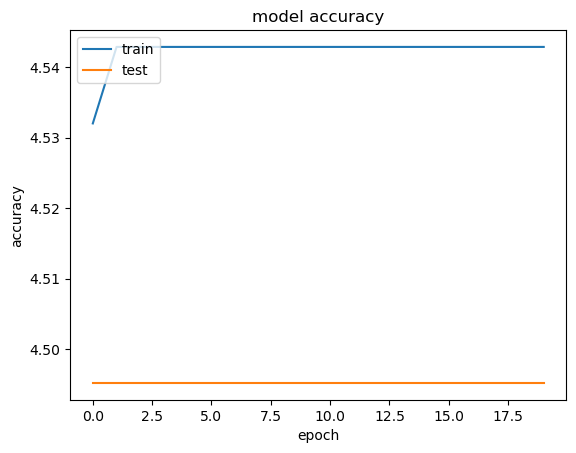

In [89]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

То что очень не хочет увидеть, все же увидел. Градиент быстро уходит в ноль и сеть не обучается. Здесь похоже нужны регуляризации, чтобы улучшить ситуацию. Правда, работа и так растягивается поэтому буду завершать.

**Вывод**: использование дропаутов и достаточно глубоких сетей позволяют получить хороший результат. Как оказалось, его надо регулярно контролировать с т.з. переобчения и ухода градиента в ноль. В то же время значения параметров для функций (а их можно использовать везде) похоже уже подобраны наиболее оптимальным образом. Так что если что-то и менять, то конкретно со знанием дела. И если результата нет, то прекращать.

PS При работе с видеоадаптером похоже, что в оперативной памяти выделяется участок неперемещаемой памяти, т.е. который не может быть помещён в swap. Из-за этого есть риск падения notebook. Не очень приятная история. Надо делать чаще сохранения. Особенно если модели долго обучаются.